In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("nifty_500_quarterly_results.csv")
data

,name,NSE_code,BSE_code,sector,industry,revenue,operating_expenses,operating_profit,operating_profit_margin,depreciation,interest,profit_before_tax,tax,net_profit,EPS,profit_TTM,EPS_TTM
0,3M India Ltd.,3MINDIA,523395,GENERAL INDUSTRIALS,INDUSTRIAL MACHINERY,"1,057",847.4,192.1,18.48%,12.9,0.7,195.9,49.8,146.1,129.7,535.9,475.7
1,ACC Ltd.,ACC,500410,CEMENT AND CONSTRUCTION,CEMENT & CEMENT PRODUCTS,"4,644.8","3,885.4",549.3,12.39%,212.8,28.9,517.7,131.5,387.9,20.7,"1,202.7",64.0
2,AIA Engineering Ltd.,AIAENG,532683,GENERAL INDUSTRIALS,OTHER INDUSTRIAL GOODS,"1,357.1",912.7,382.1,29.51%,24.5,7.4,412.5,88.4,323.1,34.3,"1,216.1",128.9
3,APL Apollo Tubes Ltd.,APLAPOLLO,533758,METALS & MINING,IRON & STEEL PRODUCTS,"4,650","4,305.4",325,7.02%,41.3,26.6,276.7,73.8,202.9,7.3,767.5,27.7
4,Au Small Finance Bank Ltd.,AUBANK,540611,BANKING AND FINANCE,BANKS,"2,956.5","1,026.7",647.7,25.59%,0,"1,282.1",533.4,131.5,401.8,6.0,"1,606.2",24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,Allcargo Logistics Ltd.,ALLCARGO,532749,TRANSPORTATION,TRANSPORTATION - LOGISTICS,"3,336.3","3,188.8",118,3.57%,106.7,36.7,14.2,1.3,21.8,0.9,361.9,14.7
497,Sheela Foam Ltd.,SFL,540203,DIVERSIFIED CONSUMER SERVICES,FURNITURE-FURNISHING-PAINTS,637.6,547,66.2,10.80%,21.9,8.6,60.2,15.6,44,4.5,192.4,17.7
498,Alok Industries Ltd.,ALOKINDS,521070,TEXTILES APPARELS & ACCESSORIES,TEXTILES,"1,369.3","1,323.1",35.9,2.64%,78.6,142.2,-174.6,0,-174.8,-0.3,-948.4,-1.9
499,Minda Corporation Ltd.,MINDACORP,538962,AUTOMOBILES & AUTO COMPONENTS,AUTO PARTS & EQUIPMENT,"1,197.9","1,064.5",131.3,10.98%,41.4,14.9,77,18.7,58.8,2.5,278.2,11.6


In [3]:
data.isnull().sum()

name                       0
NSE_code                   0
BSE_code                   0
sector                     0
industry                   0
revenue                    1
operating_expenses         1
operating_profit           1
operating_profit_margin    1
depreciation               1
interest                   1
profit_before_tax          1
tax                        1
net_profit                 1
EPS                        1
profit_TTM                 3
EPS_TTM                    3
dtype: int64

In [4]:
data.dropna(inplace=True)

In [5]:
data.isnull().sum()

name                       0
NSE_code                   0
BSE_code                   0
sector                     0
industry                   0
revenue                    0
operating_expenses         0
operating_profit           0
operating_profit_margin    0
depreciation               0
interest                   0
profit_before_tax          0
tax                        0
net_profit                 0
EPS                        0
profit_TTM                 0
EPS_TTM                    0
dtype: int64

In [6]:
data.isnull().any()

name                       False
NSE_code                   False
BSE_code                   False
sector                     False
industry                   False
revenue                    False
operating_expenses         False
operating_profit           False
operating_profit_margin    False
depreciation               False
interest                   False
profit_before_tax          False
tax                        False
net_profit                 False
EPS                        False
profit_TTM                 False
EPS_TTM                    False
dtype: bool

In [7]:
data.head()

,name,NSE_code,BSE_code,sector,industry,revenue,operating_expenses,operating_profit,operating_profit_margin,depreciation,interest,profit_before_tax,tax,net_profit,EPS,profit_TTM,EPS_TTM
0,3M India Ltd.,3MINDIA,523395,GENERAL INDUSTRIALS,INDUSTRIAL MACHINERY,"1,057",847.4,192.1,18.48%,12.9,0.7,195.9,49.8,146.1,129.7,535.9,475.7
1,ACC Ltd.,ACC,500410,CEMENT AND CONSTRUCTION,CEMENT & CEMENT PRODUCTS,"4,644.8","3,885.4",549.3,12.39%,212.8,28.9,517.7,131.5,387.9,20.7,"1,202.7",64.0
2,AIA Engineering Ltd.,AIAENG,532683,GENERAL INDUSTRIALS,OTHER INDUSTRIAL GOODS,"1,357.1",912.7,382.1,29.51%,24.5,7.4,412.5,88.4,323.1,34.3,"1,216.1",128.9
3,APL Apollo Tubes Ltd.,APLAPOLLO,533758,METALS & MINING,IRON & STEEL PRODUCTS,"4,650","4,305.4",325,7.02%,41.3,26.6,276.7,73.8,202.9,7.3,767.5,27.7
4,Au Small Finance Bank Ltd.,AUBANK,540611,BANKING AND FINANCE,BANKS,"2,956.5","1,026.7",647.7,25.59%,0,"1,282.1",533.4,131.5,401.8,6.0,"1,606.2",24.0


In [8]:
data.tail()

,name,NSE_code,BSE_code,sector,industry,revenue,operating_expenses,operating_profit,operating_profit_margin,depreciation,interest,profit_before_tax,tax,net_profit,EPS,profit_TTM,EPS_TTM
495,Procter & Gamble Health Ltd.,PGHL,500126,PHARMACEUTICALS & BIOTECHNOLOGY,PHARMACEUTICALS,311,216.3,88.7,29.08%,6.5,0.2,88,22.5,65.6,39.5,231.4,139.4
496,Allcargo Logistics Ltd.,ALLCARGO,532749,TRANSPORTATION,TRANSPORTATION - LOGISTICS,"3,336.3","3,188.8",118,3.57%,106.7,36.7,14.2,1.3,21.8,0.9,361.9,14.7
497,Sheela Foam Ltd.,SFL,540203,DIVERSIFIED CONSUMER SERVICES,FURNITURE-FURNISHING-PAINTS,637.6,547,66.2,10.80%,21.9,8.6,60.2,15.6,44,4.5,192.4,17.7
498,Alok Industries Ltd.,ALOKINDS,521070,TEXTILES APPARELS & ACCESSORIES,TEXTILES,"1,369.3","1,323.1",35.9,2.64%,78.6,142.2,-174.6,0,-174.8,-0.3,-948.4,-1.9
499,Minda Corporation Ltd.,MINDACORP,538962,AUTOMOBILES & AUTO COMPONENTS,AUTO PARTS & EQUIPMENT,"1,197.9","1,064.5",131.3,10.98%,41.4,14.9,77,18.7,58.8,2.5,278.2,11.6


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 498 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     498 non-null    object 
 1   NSE_code                 498 non-null    object 
 2   BSE_code                 498 non-null    object 
 3   sector                   498 non-null    object 
 4   industry                 498 non-null    object 
 5   revenue                  498 non-null    object 
 6   operating_expenses       498 non-null    object 
 7   operating_profit         498 non-null    object 
 8   operating_profit_margin  498 non-null    object 
 9   depreciation             498 non-null    object 
 10  interest                 498 non-null    object 
 11  profit_before_tax        498 non-null    object 
 12  tax                      498 non-null    object 
 13  net_profit               498 non-null    object 
 14  EPS                      498 no

In [10]:
data['BSE_code'].unique()

array(['523395', '500410', '532683', '533758', '540611', '532921', 'ASM',
       '535755', '500003', '532331', '533573', '539523', '500008',
       '500425', '508869', '500877', '500477', '500820', '532830',
       '500027', '524804', '512573', '540376', '532215', '532977',
       '500034', '532978', '500490', '502355', '500038', '532134',
       '532149', '500043', '509480', '500049', '500493', '500103',
       '500547', '532454', '534816', '532523', '500335', '526612',
       '500067', '501425', '500530', '532929', '500825', '519600',
       '500092', '532321', '511196', '532483', '513375', '500870',
       '500878', '532885', '532548', '532443', '500085', '511243',
       '500087', '532210', '533278', '500830', '531344', '506395',
       '539876', '500480', '532175', '523367', '532868', '500096',
       '532848', '532488', '539524', '500124', '500125', '505200',
       '531162', '540153', '532178', '500495', '500086', '500469',
       '500144', '500940', '532809', '532155', '500660'

In [11]:
data = data[~data['BSE_code'].str.contains('ASM', case=False, na=False)]
data = data[~data['BSE_code'].str.contains('CDSL', case=False, na=False)]
data = data[~data['BSE_code'].str.contains('BSE', case=False, na=False)]

In [12]:
data['interest']=data['interest'].str.replace(',','')
data['interest']=data['interest'].astype(float)
data['revenue']=data['revenue'].str.replace(',','')
data['revenue']=data['revenue'].astype(float)
data['BSE_code']=data['BSE_code'].str.replace(',','')
data['BSE_code']=data['BSE_code'].astype(float)
data['operating_expenses']=data['operating_expenses'].str.replace(',','')
data['operating_expenses']=data['operating_expenses'].astype(float)
data['operating_profit']=data['operating_profit'].str.replace(',','')
data['operating_profit']=data['operating_profit'].astype(float)
data['operating_profit_margin']=data['operating_profit_margin'].str.replace(',','')
data['operating_profit_margin']=data['operating_profit_margin'].str.replace('%','')
data['operating_profit_margin']=data['operating_profit_margin'].astype(float)
data['depreciation']=data['depreciation'].str.replace(',','')
data['depreciation']=data['depreciation'].astype(float)
data['profit_before_tax']=data['profit_before_tax'].str.replace(',','')
data['profit_before_tax']=data['profit_before_tax'].astype(float)
data['tax']=data['tax'].str.replace(',','')
data['tax']=data['tax'].astype(float)
data['net_profit']=data['net_profit'].str.replace(',','')
data['net_profit']=data['net_profit'].astype(float)
data['profit_TTM']=data['profit_TTM'].str.replace(',','')
data['profit_TTM']=data['profit_TTM'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 483 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     483 non-null    object 
 1   NSE_code                 483 non-null    object 
 2   BSE_code                 483 non-null    float64
 3   sector                   483 non-null    object 
 4   industry                 483 non-null    object 
 5   revenue                  483 non-null    float64
 6   operating_expenses       483 non-null    float64
 7   operating_profit         483 non-null    float64
 8   operating_profit_margin  483 non-null    float64
 9   depreciation             483 non-null    float64
 10  interest                 483 non-null    float64
 11  profit_before_tax        483 non-null    float64
 12  tax                      483 non-null    float64
 13  net_profit               483 non-null    float64
 14  EPS                      483 no

In [13]:
data.shape

(483, 17)

In [14]:
data.describe()

,BSE_code,revenue,operating_expenses,operating_profit,operating_profit_margin,depreciation,interest,profit_before_tax,tax,net_profit,EPS,profit_TTM,EPS_TTM
count,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000
mean,525109.248447,7724.198137,5617.824431,1443.769565,21.465259,241.387371,833.025466,950.938716,262.317184,675.201449,15.491718,2582.726087,54.825673
std,17309.277932,22335.496857,18034.520247,3836.624740,30.501134,955.498793,4050.960551,2820.447444,804.341212,2075.655608,67.234343,7468.665047,196.392532
min,500002.000000,-167.200000,-180.100000,-508.100000,-431.870000,0.000000,0.000000,-7919.000000,-657.500000,-8737.900000,-32.400000,-30986.800000,-214.800000
25%,503936.500000,811.900000,552.200000,119.300000,11.665000,14.350000,4.950000,82.100000,17.650000,62.300000,2.100000,267.150000,8.900000
50%,532439.000000,1772.700000,1248.600000,277.500000,18.180000,40.800000,22.900000,205.600000,48.800000,154.600000,5.300000,608.100000,22.300000
75%,540124.000000,4522.450000,3183.900000,829.800000,27.940000,99.850000,137.200000,609.150000,131.500000,434.650000,14.200000,1675.000000,53.500000
max,590071.000000,238797.000000,193988.000000,40968.000000,104.210000,12585.000000,62955.200000,26493.000000,9092.000000,17394.000000,1383.300000,69304.100000,3988.000000


In [15]:
data.columns

Index(['name', 'NSE_code', 'BSE_code', 'sector', 'industry', 'revenue',
       'operating_expenses', 'operating_profit', 'operating_profit_margin',
       'depreciation', 'interest', 'profit_before_tax', 'tax', 'net_profit',
       'EPS', 'profit_TTM', 'EPS_TTM'],
      dtype='object')

In [16]:
data.duplicated().sum()

0

In [17]:
data.drop(["name"],inplace=True,axis=1)

In [18]:
x=data['sector'].value_counts()
x.to_csv('sec.csv')
x=pd.read_csv('sec.csv')
x.sort_values(by='count',ascending=False)
x=x.head(10)
x

,sector,count
0,BANKING AND FINANCE,74
1,SOFTWARE & SERVICES,39
2,GENERAL INDUSTRIALS,37
3,PHARMACEUTICALS & BIOTECHNOLOGY,34
4,AUTOMOBILES & AUTO COMPONENTS,34
5,CHEMICALS & PETROCHEMICALS,33
6,CEMENT AND CONSTRUCTION,23
7,DIVERSIFIED CONSUMER SERVICES,20
8,FMCG,18
9,CONSUMER DURABLES,18


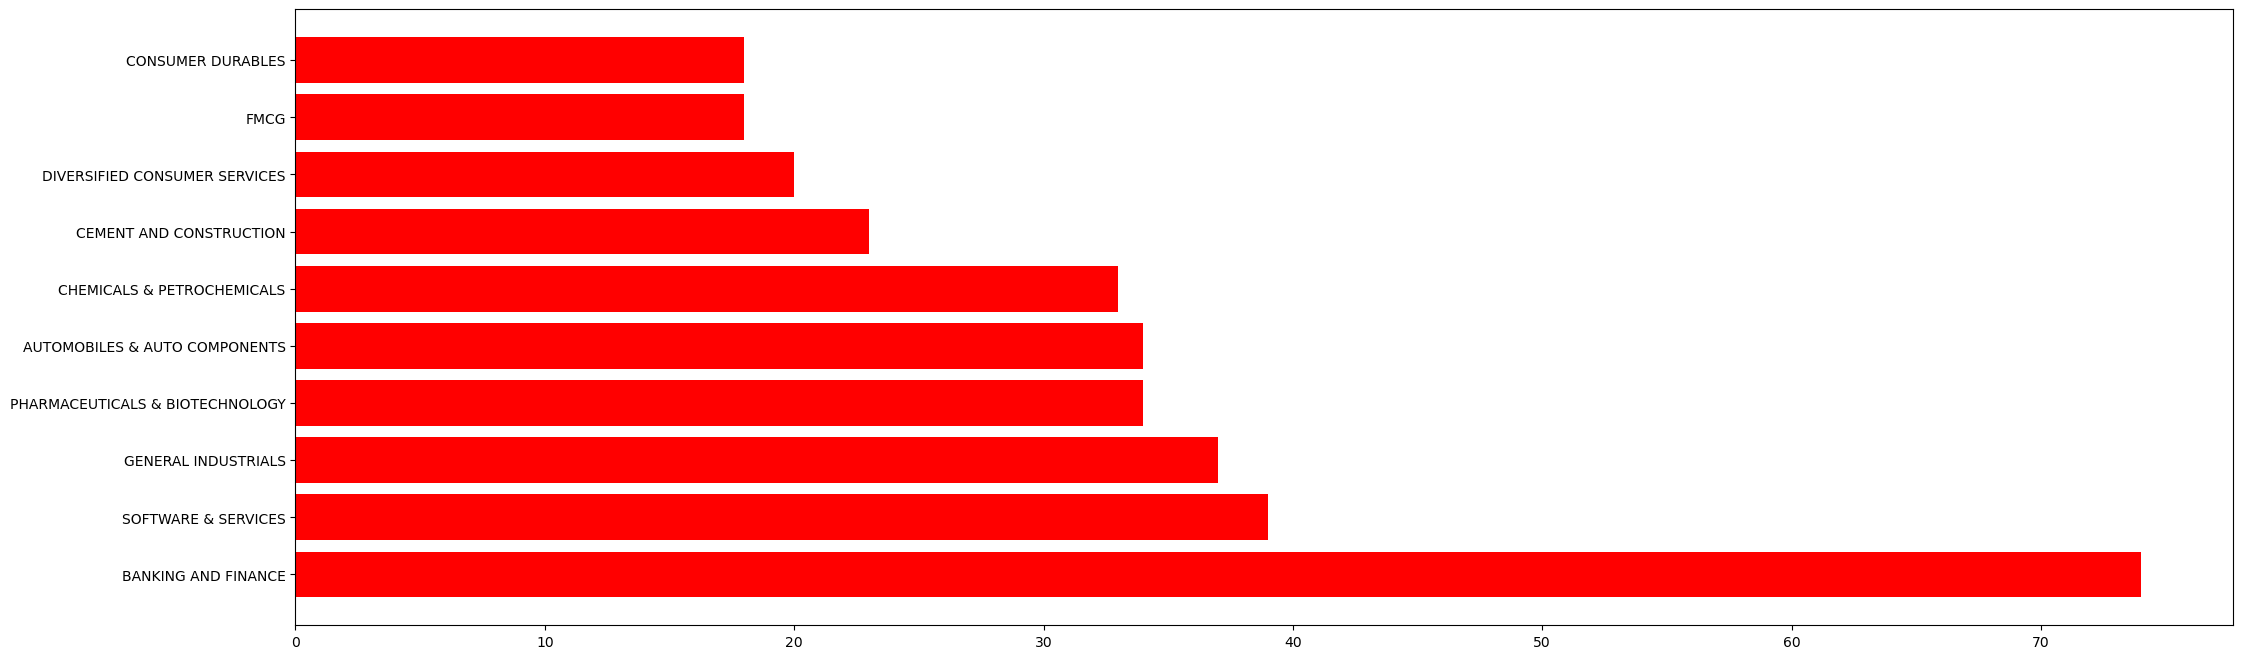

In [19]:
plt.figure(figsize=(25,8))
plt.barh(x['sector'],x['count'],color="r")
plt.show()

In [20]:
data['industry'].unique()

array(['INDUSTRIAL MACHINERY', 'CEMENT & CEMENT PRODUCTS',
       'OTHER INDUSTRIAL GOODS', 'IRON & STEEL PRODUCTS', 'BANKS',
       'MARINE PORT & SERVICES', 'DEPARTMENT STORES',
       'OIL MARKETING & DISTRIBUTION', 'PHARMACEUTICALS',
       'AUTO PARTS & EQUIPMENT', 'HEALTHCARE FACILITIES',
       'AUTO TYRES & RUBBER PRODUCTS', 'COMMERCIAL VEHICLES',
       'FURNITURE-FURNISHING-PAINTS', 'PLASTIC PRODUCTS',
       'SPECIALTY CHEMICALS', 'OTHER FOOD PRODUCTS', '2/3 WHEELERS',
       'FINANCE (INCLUDING NBFCS)', 'HOLDING COMPANIES', 'SUGAR',
       'FOOTWEAR', 'DEFENCE', 'OTHER INDUSTRIAL PRODUCTS',
       'HEAVY ELECTRICAL EQUIPMENT', 'REFINERIES/PETRO-PRODUCTS',
       'TELECOM SERVICES', 'OTHER TELECOM SERVICES', 'BIOTECHNOLOGY',
       'TRANSPORTATION - LOGISTICS', 'CONSUMER ELECTRONICS',
       'TEA & COFFEE', 'REALTY', 'PACKAGED FOODS',
       'OTHER FINANCIAL SERVICES', 'HOUSING FINANCE', 'FOREST PRODUCTS',
       'FERTILIZERS', 'COAL', 'PERSONAL PRODUCTS',
       'WAREHOUSIN

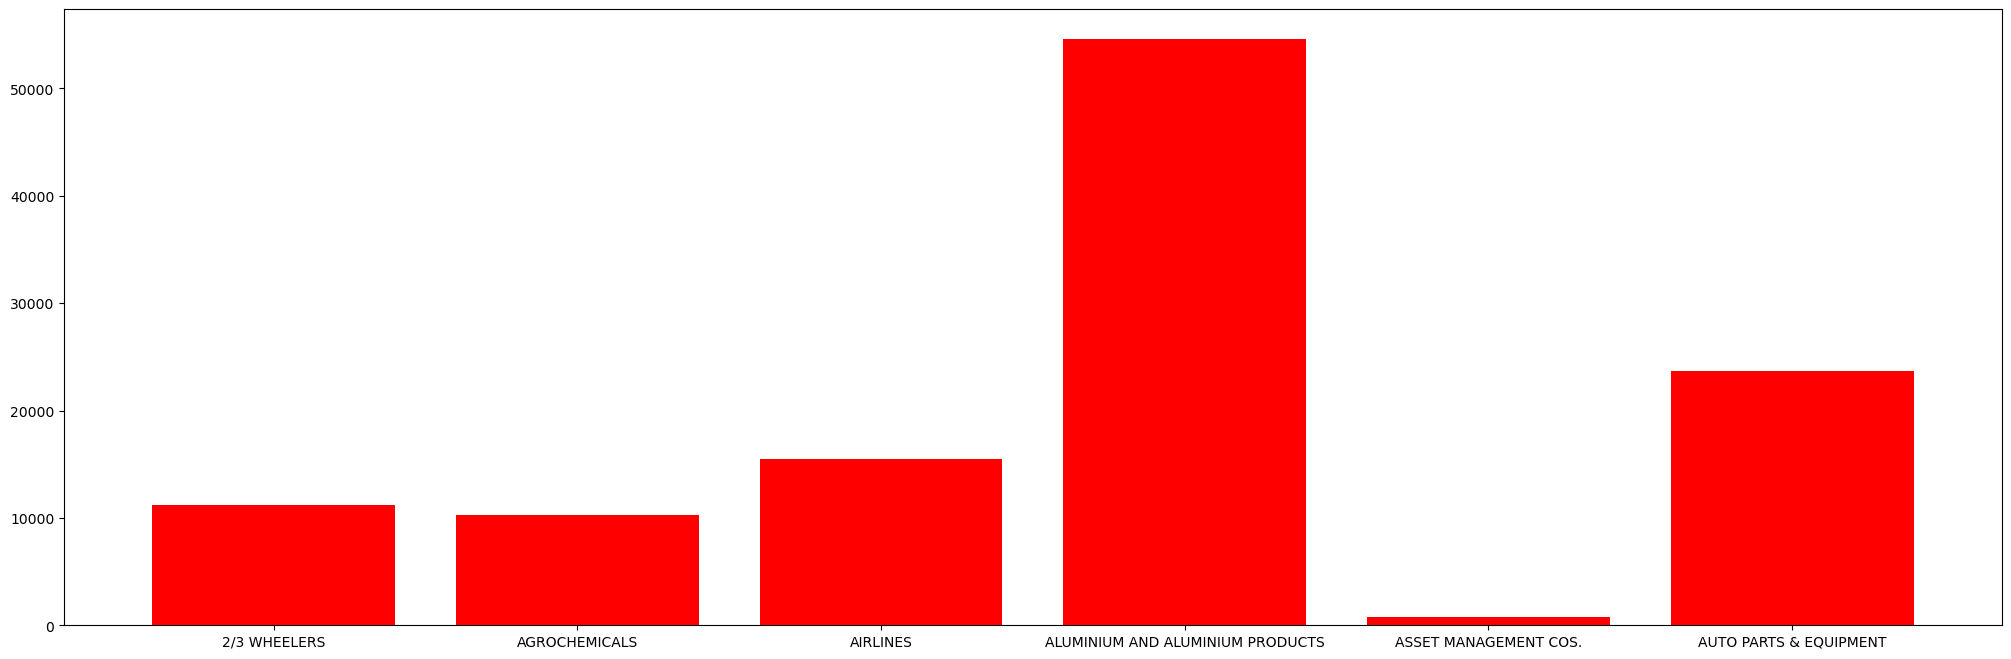

In [21]:
group=data.groupby("industry")
grouped=group[["industry","revenue"]].max()
a=pd.DataFrame(grouped)
x=a["industry"].head(6)
y=a["revenue"].head(6)
plt.figure(figsize=(25,8))
plt.bar(x,y,color="r")
plt.show()

In [22]:
le1=LabelEncoder()
le2=LabelEncoder()
le3=LabelEncoder()
data['NSE_code']=le1.fit_transform(data['NSE_code'])
data['sector']=le2.fit_transform(data['sector'])
data['industry']=le3.fit_transform(data['industry'])
data

,NSE_code,BSE_code,sector,industry,revenue,operating_expenses,operating_profit,operating_profit_margin,depreciation,interest,profit_before_tax,tax,net_profit,EPS,profit_TTM,EPS_TTM
0,1,523395.0,12,51,1057.0,847.4,192.1,18.48,12.9,0.7,195.9,49.8,146.1,129.7,535.9,475.7
1,9,500410.0,2,15,4644.8,3885.4,549.3,12.39,212.8,28.9,517.7,131.5,387.9,20.7,1202.7,64.0
2,16,532683.0,12,69,1357.1,912.7,382.1,29.51,24.5,7.4,412.5,88.4,323.1,34.3,1216.1,128.9
3,26,533758.0,16,54,4650.0,4305.4,325.0,7.02,41.3,26.6,276.7,73.8,202.9,7.3,767.5,27.7
4,38,540611.0,1,7,2956.5,1026.7,647.7,25.59,0.0,1282.1,533.4,131.5,401.8,6.0,1606.2,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,343,500126.0,18,76,311.0,216.3,88.7,29.08,6.5,0.2,88.0,22.5,65.6,39.5,231.4,139.4
496,20,532749.0,25,91,3336.3,3188.8,118.0,3.57,106.7,36.7,14.2,1.3,21.8,0.9,361.9,14.7
497,394,540203.0,7,38,637.6,547.0,66.2,10.80,21.9,8.6,60.2,15.6,44.0,4.5,192.4,17.7
498,21,521070.0,24,90,1369.3,1323.1,35.9,2.64,78.6,142.2,-174.6,0.0,-174.8,-0.3,-948.4,-1.9


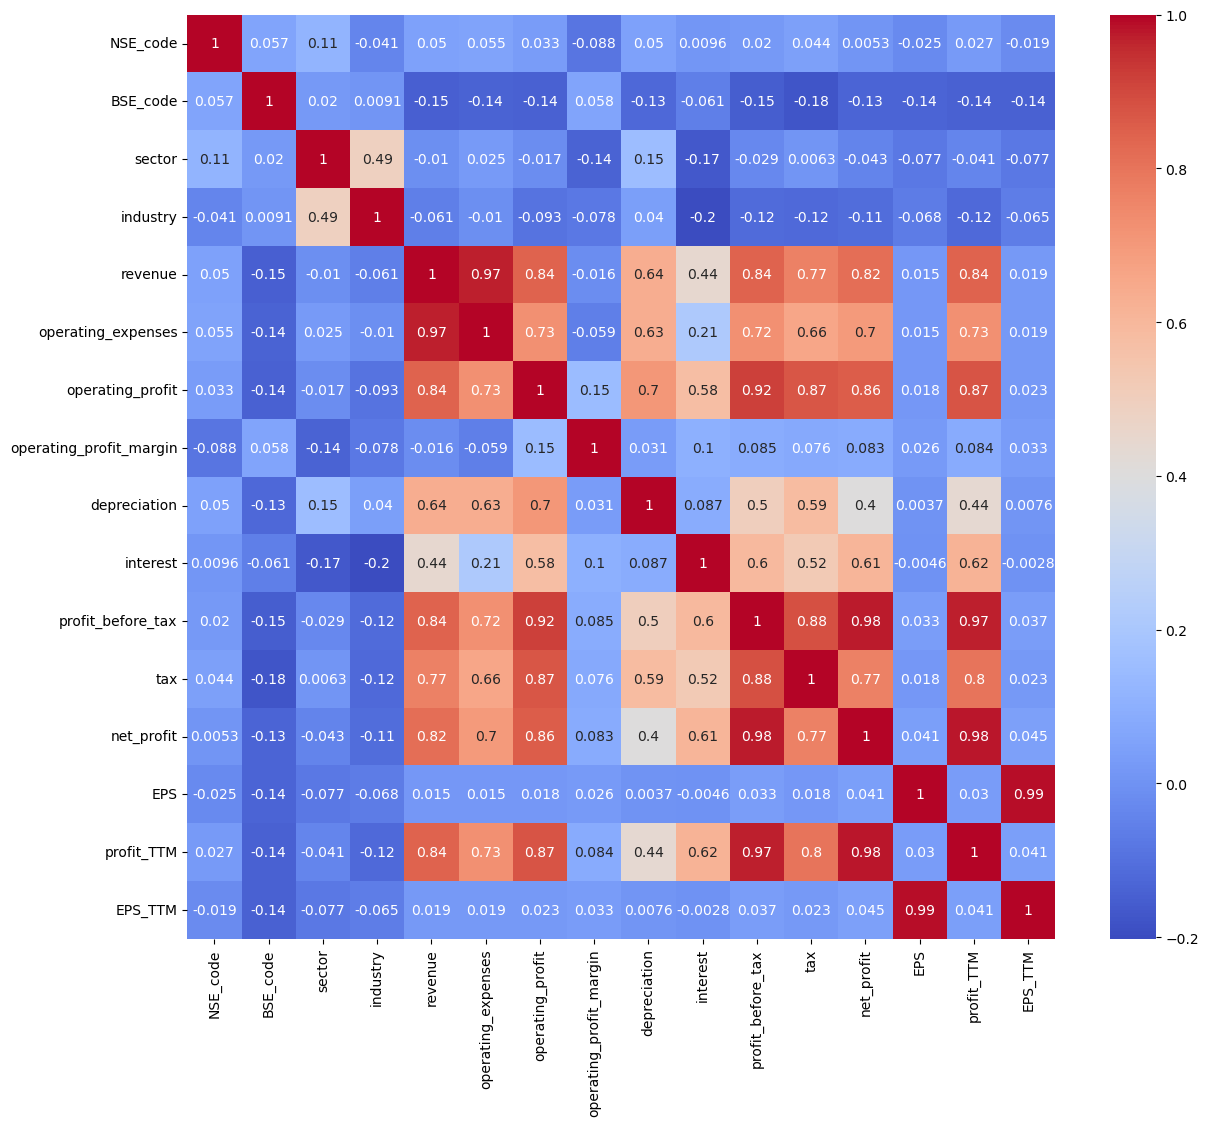

In [23]:
plt.figure(figsize=(14,12))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.show()

In [24]:
x=data.drop(['EPS_TTM'],axis=1)
y=data['EPS_TTM']
y

0      475.7
1       64.0
2      128.9
3       27.7
4       24.0
       ...  
495    139.4
496     14.7
497     17.7
498     -1.9
499     11.6
Name: EPS_TTM, Length: 483, dtype: float64

In [25]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)
xtrain
xtest

array([[ 1.02463958e+00,  1.02722276e+00,  4.28359167e-01, ...,
        -3.23551469e-01, -1.79966496e-01, -3.34307771e-01],
       [ 1.26724489e+00, -4.68810030e-01, -6.32310645e-01, ...,
        -3.13116281e-01, -1.43614631e-01, -3.49191391e-01],
       [ 5.89377107e-01,  4.44959345e-01,  1.01762017e+00, ...,
        -8.96867330e-02, -4.26372286e-02, -5.82441759e-02],
       ...,
       [ 5.18022604e-01, -1.42324122e+00, -1.60901840e-01, ...,
         1.49369111e-01,  1.05599691e+00,  1.00797939e-01],
       [ 1.63115286e+00, -1.15045622e+00,  4.28359167e-01, ...,
        -3.19790564e-01, -1.93430150e-01, -3.50183633e-01],
       [-1.59845179e-01,  3.94060182e-01, -1.10371945e+00, ...,
         5.74990607e-04, -2.08240169e-01,  1.69980190e-03]])

In [27]:
model1=LinearRegression()

In [28]:
model1.fit(xtrain,ytrain)

LinearRegression()

In [29]:
print(model1.score(xtrain,ytrain)*100)

98.30279981916536


In [30]:
print(model1.score(xtest,ytest)*100)

85.06340189209023


In [31]:
model2=DecisionTreeRegressor()

In [32]:
model2.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [33]:
print(model2.score(xtrain,ytrain)*100)

100.0


In [34]:
print(model2.score(xtest,ytest)*100)

70.97846170849873


In [35]:
model3=RandomForestRegressor(n_estimators=100)

In [36]:
model3.fit(xtrain,ytrain)

RandomForestRegressor()

In [37]:
print(model3.score(xtrain,ytrain)*100)

93.0051497665664


In [38]:
print(model3.score(xtest,ytest)*100)

92.5773391085554


In [39]:
model4=KNeighborsRegressor(n_neighbors=10)

In [40]:
model4.fit(xtrain,ytrain)

KNeighborsRegressor(n_neighbors=10)

In [41]:
print(model4.score(xtrain,ytrain)*100)

34.606589301878884


In [42]:
print(model4.score(xtest,ytest)*100)

32.83126388212223


In [43]:
model5=SVR()

In [44]:
model5.fit(xtrain,ytrain)

SVR()

In [45]:
print(model5.score(xtrain,ytrain)*100)

-1.3381439702105258


In [46]:
print(model5.score(xtest,ytest)*100)

-11.063219148026038


In [47]:
data

,NSE_code,BSE_code,sector,industry,revenue,operating_expenses,operating_profit,operating_profit_margin,depreciation,interest,profit_before_tax,tax,net_profit,EPS,profit_TTM,EPS_TTM
0,1,523395.0,12,51,1057.0,847.4,192.1,18.48,12.9,0.7,195.9,49.8,146.1,129.7,535.9,475.7
1,9,500410.0,2,15,4644.8,3885.4,549.3,12.39,212.8,28.9,517.7,131.5,387.9,20.7,1202.7,64.0
2,16,532683.0,12,69,1357.1,912.7,382.1,29.51,24.5,7.4,412.5,88.4,323.1,34.3,1216.1,128.9
3,26,533758.0,16,54,4650.0,4305.4,325.0,7.02,41.3,26.6,276.7,73.8,202.9,7.3,767.5,27.7
4,38,540611.0,1,7,2956.5,1026.7,647.7,25.59,0.0,1282.1,533.4,131.5,401.8,6.0,1606.2,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,343,500126.0,18,76,311.0,216.3,88.7,29.08,6.5,0.2,88.0,22.5,65.6,39.5,231.4,139.4
496,20,532749.0,25,91,3336.3,3188.8,118.0,3.57,106.7,36.7,14.2,1.3,21.8,0.9,361.9,14.7
497,394,540203.0,7,38,637.6,547.0,66.2,10.80,21.9,8.6,60.2,15.6,44.0,4.5,192.4,17.7
498,21,521070.0,24,90,1369.3,1323.1,35.9,2.64,78.6,142.2,-174.6,0.0,-174.8,-0.3,-948.4,-1.9


In [48]:
# nse=input("Enter nse code: ")
# bse=float(input("ener bse code: "))
# sec=input("enter sector: ")
# ind=input("enter industry: ")
# rev=float(input("enter rev: "))
# op_exp=float(input("enter operating expense: "))
# op=float(input("enter operating profit: "))
# opm=float(input("enter operating profit margin: "))
# dep=float(input("enter depreciation: "))
# inte=float(input("enter interest: "))
# pbt=float(input("enter profit before tax: "))
# tax=float(input("enter tax: "))

In [49]:
# ntp=float(input("enter net profit: "))
# eps=float(input("enter earning per share: "))
# pttm=float(input("enter profit TTM: "))

In [50]:
# nse=le1.transform([nse])
# nse

In [51]:
# sec=le2.transform([sec])
# sec

In [52]:
# ind=le3.transform([ind])
# ind

In [53]:
# import numpy as np
# user_input=np.array([[nse[0],bse,sec[0],ind[0],rev,op_exp,op,opm,dep,inte,pbt,tax,ntp,eps,pttm]])

In [54]:
# model3.predict(user_input)